# Exploring the ZAT data

Ensure that you have the right python environment activated with the required libraries:
    
```bash
# Activate the right environment
!source ../venv/bin/activate
```

# Load and explore Shapefile data

In [1]:

# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
import contextily as ctx
input_path_shapefile = '../data/input/zat/ZAT.shp'
output_path_figures = '../figures'


In [2]:
# Load the shapefile

zat_data = gpd.read_file(input_path_shapefile)

In [3]:
# Basic exploration
print(zat_data.head())
print(zat_data.columns)

# Check the coordinate reference system (CRS)
print(zat_data.crs)

     ZAT  GEN_2019  ATR_2019  GEN_2026  ATR_2026  GEN_2030  ATR_2030  \
0  810.0     1.641   1.56500     1.641   1.58669     1.641    1.5868   
1  809.0     0.000  77.03815     0.000  77.10200     0.000   77.0950   
2  823.0       NaN       NaN       NaN       NaN       NaN       NaN   
3  822.0       NaN       NaN       NaN       NaN       NaN       NaN   
4  821.0       NaN       NaN       NaN       NaN       NaN       NaN   

   VIAJ_MUJ  VIAJ_HOM  VIAJ_TRANS  PRC_MUJ  INGRESO  COSTO_PUT  PRC_ING  \
0     397.0     397.0         NaN      0.5      NaN        NaN      NaN   
1      59.0       NaN         NaN      1.0      NaN        NaN      NaN   
2       NaN       NaN         NaN      NaN      NaN        NaN      NaN   
3      84.0       NaN         NaN      1.0      NaN        NaN      NaN   
4       NaN       NaN         NaN      NaN      NaN        NaN      NaN   

    T_PUT  VIAJ_TRAB                                           geometry  
0  171.32        NaN  POLYGON Z ((-74.0820

In [ ]:
zat_data.head()

In [ ]:
zat_data.ZAT.describe()

# Analyse data completeness and quality

In [ ]:
# Analyse data completeness and quality
print(zat_data.info())
print(zat_data.describe())
print(zat_data.isnull().sum())

# Basic analysis ideas

## Visualise ZAT zones

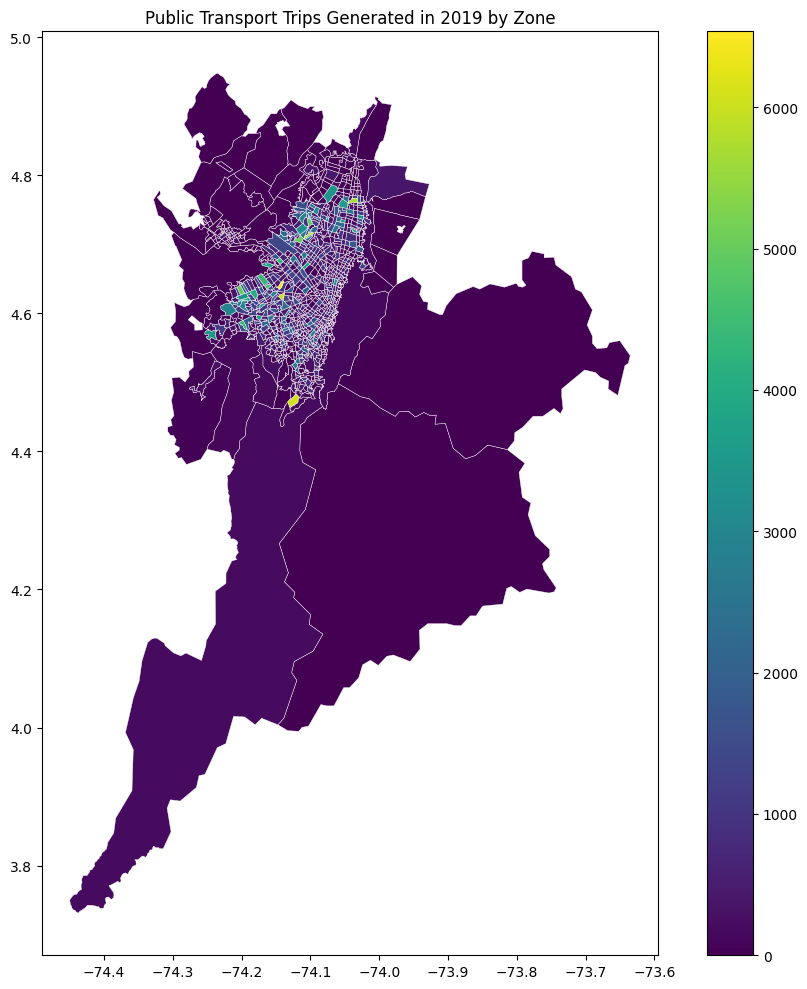

In [4]:
# 1. Visualize ZAT zones
fig, ax = plt.subplots(figsize=(10, 10))
zat_data.plot(column='GEN_2019', 
              #cmap='OrRd',
              edgecolor='white',
              linewidth=0.3, 
              legend=True,
              ax=ax)
ax.set_title('Public Transport Trips Generated in 2019 by Zone')
plt.tight_layout()
# plt.savefig(f'{output_path_figures}/zat_trips_2019.png')

In [ ]:
# see https://towardsdatascience.com/creating-beautiful-maps-with-python-beyond-the-defaults-c92593ccf2cc/ 

<Axes: title={'center': 'Nederland'}, xlabel='X', ylabel='Y'>

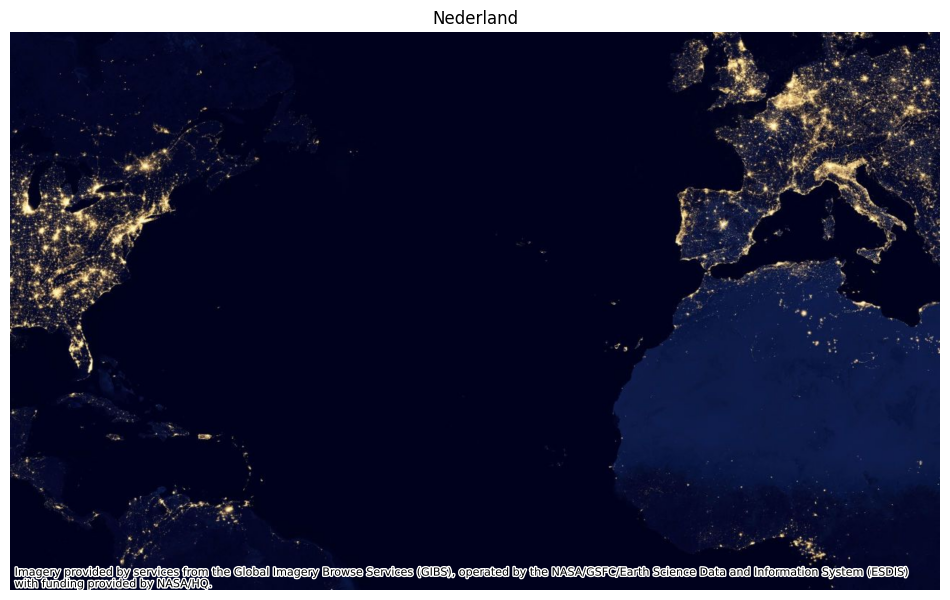

In [5]:
import contextily as cx
nightlights = cx.providers.NASAGIBS.ViirsEarthAtNight2012
ireland = cx.Place("The Netherlands", source=nightlights)
ireland.plot()

In [6]:
import contextily as cx
from shapely.geometry import box
x_min = -74.296967
x_max = -73.922058
y_min = 4.474571
y_max = 4.798975
# Create a bounding box
bbox = box(x_min, y_min, x_max, y_max)

bogota = zat_data[zat_data.to_crs("EPSG:3116").geometry.intersects(bbox)]
bogota.shape

(0, 17)

In [7]:
zat_data.plot(column='GEN_2019', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Public Transport Trips Generated in 2019 by Zone')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [25]:
bogota

,ZAT,GEN_2019,ATR_2019,GEN_2026,ATR_2026,GEN_2030,ATR_2030,VIAJ_MUJ,VIAJ_HOM,VIAJ_TRANS,PRC_MUJ,INGRESO,COSTO_PUT,PRC_ING,T_PUT,VIAJ_TRAB,geometry


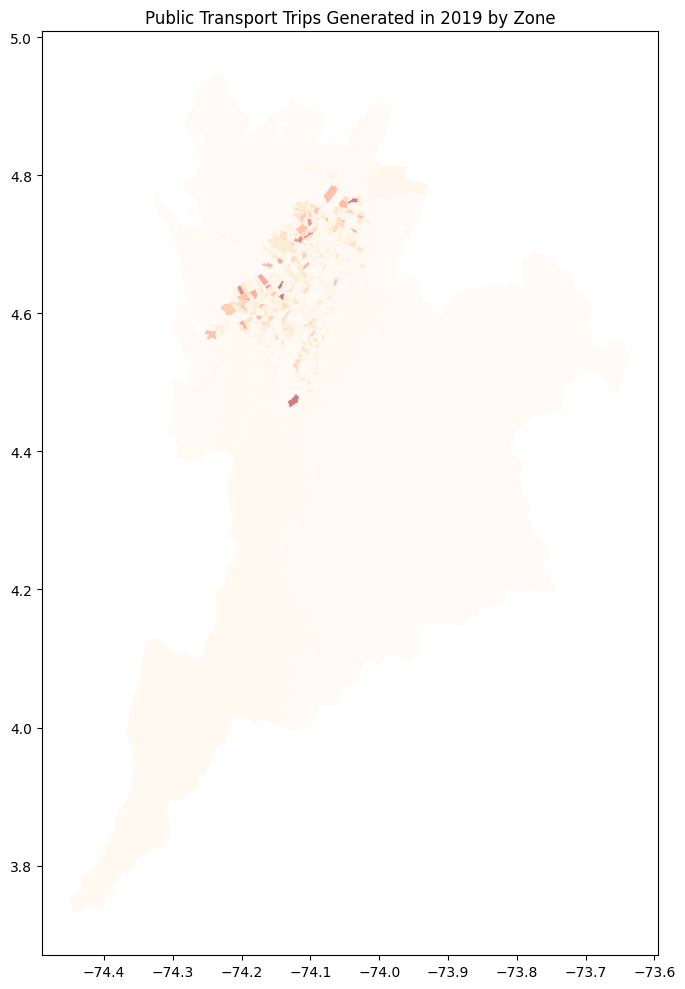

In [8]:
if not zat_data.empty:
    ax = zat_data.plot(column='GEN_2019',
                     cmap='OrRd',
                     figsize=(10, 10),
                     edgecolor='white',
                     linewidth=0.3,
                     alpha=0.5)
    ax.set_title('Public Transport Trips Generated in 2019 by Zone')
    plt.tight_layout()
else:
    print("The 'zat_data' GeoDataFrame is empty. Unable to plot.")

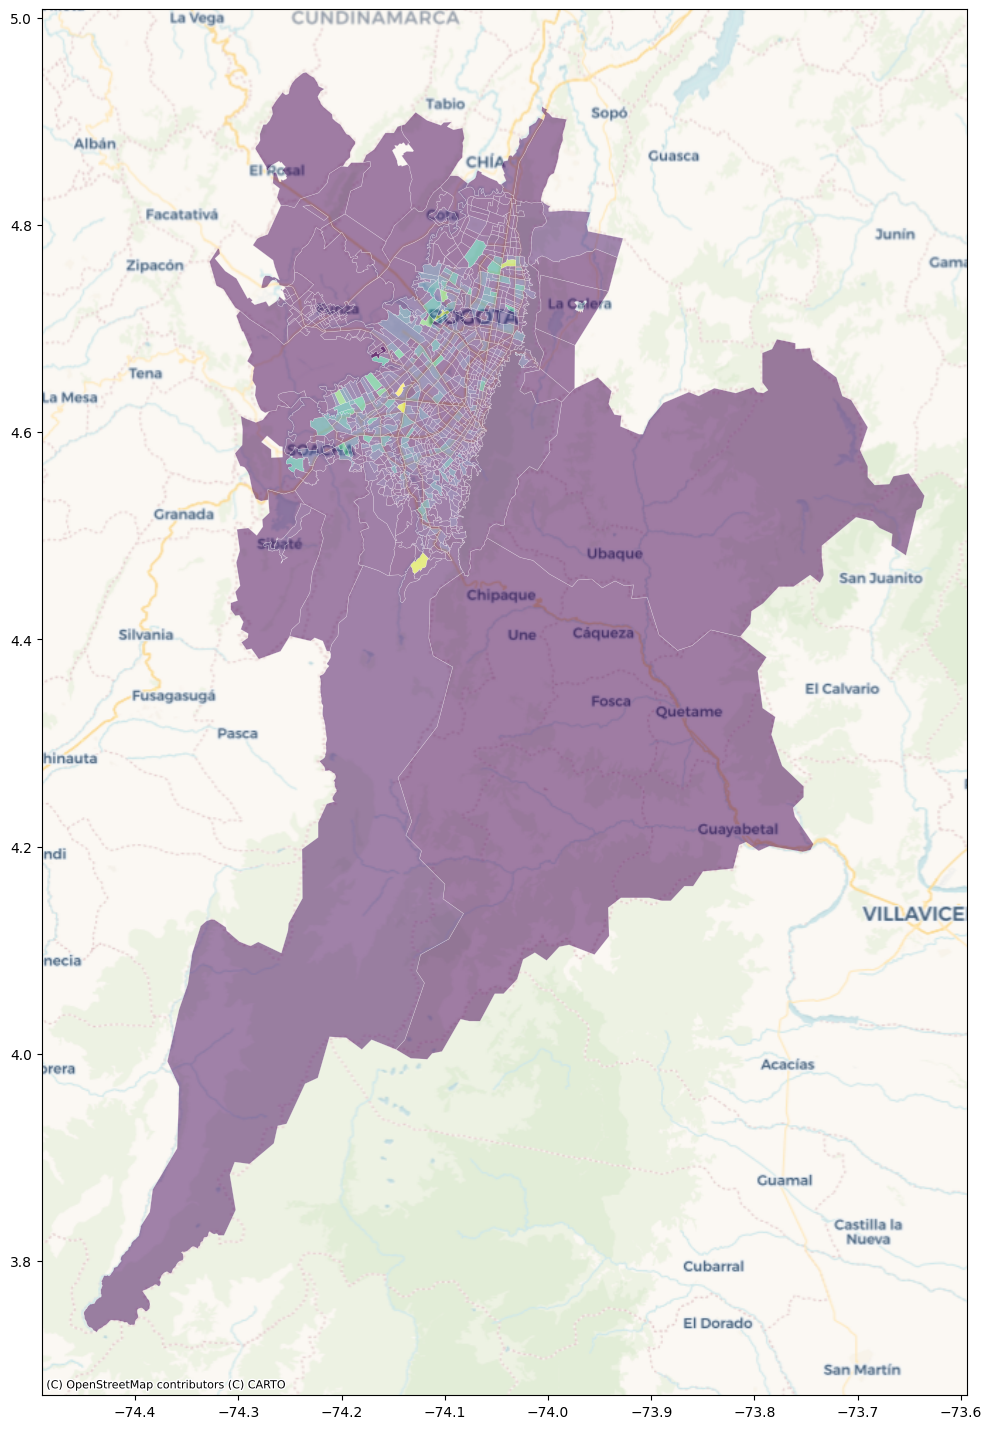

In [9]:

ax = zat_data.plot(column = 'GEN_2019',
                figsize=(18, 18), 
                edgecolor='white',
                linewidth=0.3,
                alpha=0.5)
cx.add_basemap(ax, crs=zat_data.crs.to_string(), 
               source=cx.providers.CartoDB.Voyager)

In [ ]:
import os  # To ensure the output directory exists

# Ensure the output directory exists
os.makedirs(output_path_figures, exist_ok=True)

# Adjust map visualization such that East is up and North is left
fig, ax = plt.subplots(figsize=(15, 15))
zat_data.plot(column='GEN_2019', cmap='OrRd', legend=True, ax=ax)

# Rotate the map by applying a transformation
from matplotlib.transforms import Affine2D

# Apply a 45-degree rotation
rotation = Affine2D().rotate_deg(45)
ax.set_aspect('equal')
for artist in ax.get_children():
	if hasattr(artist, 'set_transform'):
		artist.set_transform(rotation + ax.transData)

# Add a basemap
# ctx.add_basemap(ax, source=ctx.providers.Stamen.TerrainBackground, zoom=12)

# Add title and save the rotated map
ax.set_title('Public Transport Trips Generated in 2019 by Zone (Rotated)')
plt.tight_layout()
plt.savefig(f'{output_path_figures}/zat_trips_2019_rotated.png')

## Compare Trip generation between different years

In [ ]:
zat_data['growth_19_26'].describe()

/home/maarten_vanschaik/ITS-minihack/.venv/lib/python3.11/site-packages/matplotlib/colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


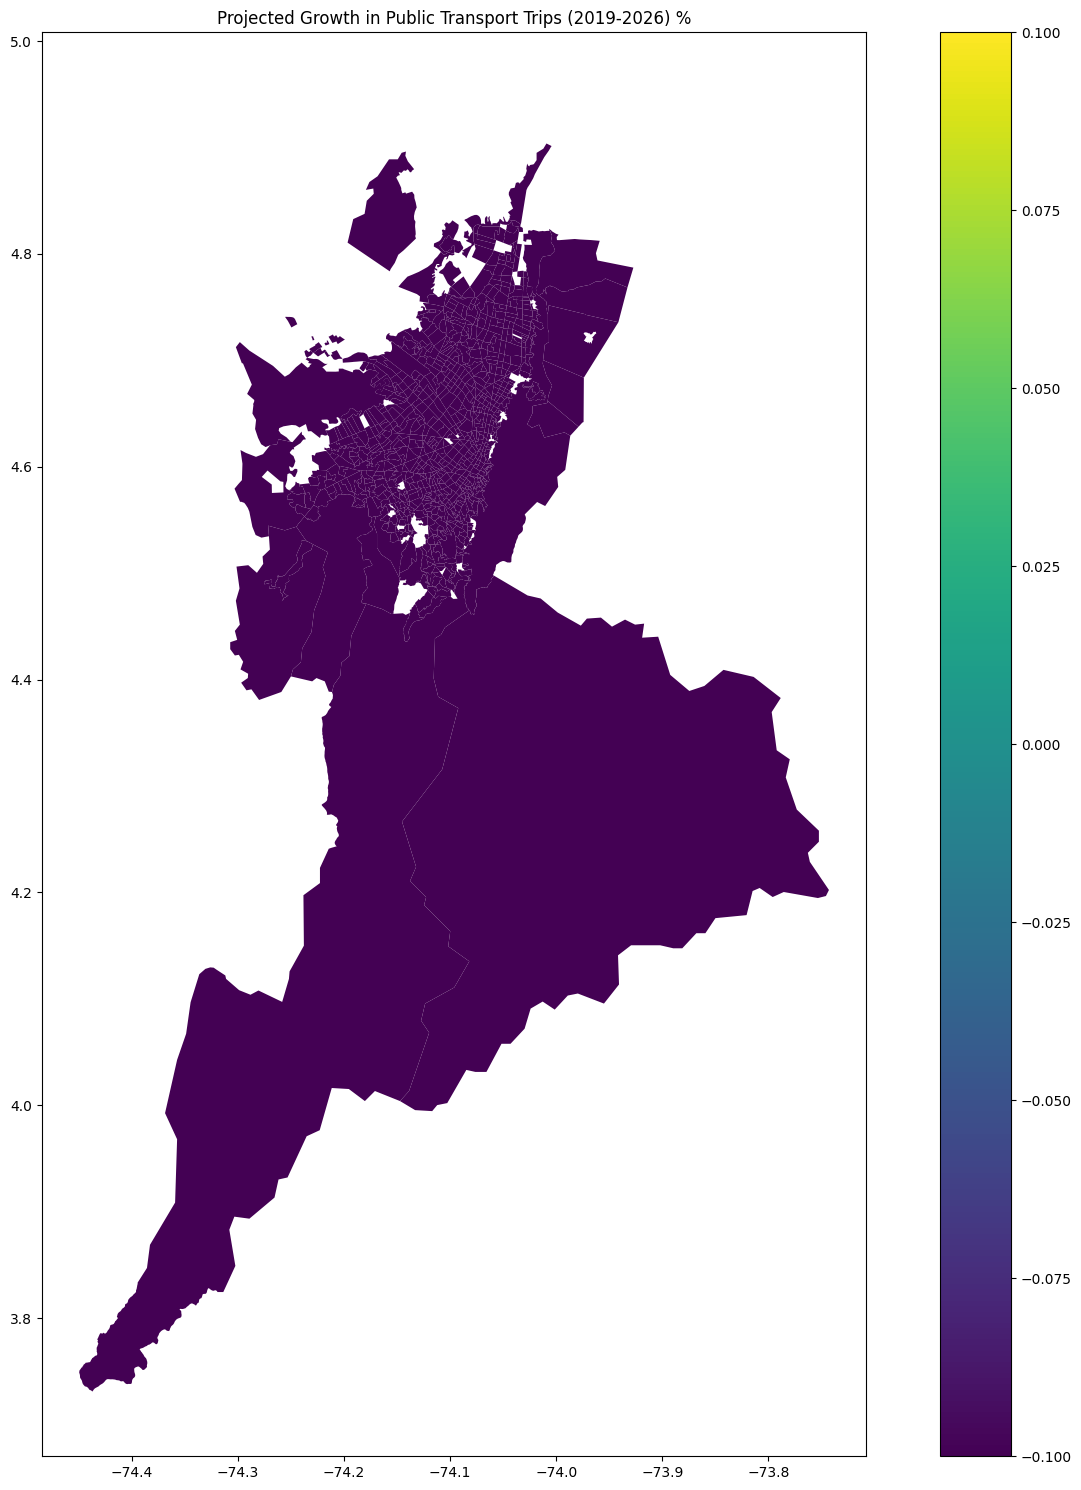

In [10]:
# 2. Compare trip generation between different years
zat_data['growth_19_26'] = (zat_data['GEN_2026'] - zat_data['GEN_2019']) / zat_data['GEN_2019'] * 100
fig, ax = plt.subplots(figsize=(15, 15))
# zat_data.plot(column='growth_19_26', cmap='RdBu', legend=True, ax=ax)
zat_data.plot(column='growth_19_26', legend=True, ax=ax)
ax.set_title('Projected Growth in Public Transport Trips (2019-2026) %')
plt.tight_layout()

## Analyse gender distribution

In [ ]:
# 3. Analyze gender distribution
zat_data['gender_ratio'] = zat_data['VIAJ_MUJ'] / zat_data['VIAJ_HOM'] 
fig, ax = plt.subplots(figsize=(15, 15))
zat_data.plot(column='gender_ratio', cmap='PiYG', legend=True, ax=ax)
ax.set_title('Ratio of Women to Men Using Public Transport')
plt.tight_layout()

## Economic analysis

In [ ]:
# 4. Economic analysis
zat_data['transport_burden'] = zat_data['COSTO_PUT'] / zat_data['INGRESO'] * 100
fig, ax = plt.subplots(figsize=(15, 15))
zat_data.plot(column='transport_burden', cmap='YlOrRd', legend=True, ax=ax)
ax.set_title('Transport Cost as % of Monthly Income')
plt.tight_layout()

# Try and find OD data

In [3]:
import geopandas as gpd
import pandas as pd
import shapefile  # pyshp library
import xml.etree.ElementTree as ET

# Function to read .dbf file
def read_dbf(file_path):
    try:
        sf = shapefile.Reader(file_path)
        fields = [field[0] for field in sf.fields if field[0] != 'DeletionFlag']
        records = sf.records()
        dbf_data = pd.DataFrame(columns=fields, data=records)
        print("DBF File Preview:")
        print(dbf_data.head())
        return dbf_data
    except Exception as e:
        print(f"Error reading .dbf file: {e}")
        return None

# Function to read .prj file
def read_prj(file_path):
    try:
        with open(file_path, 'r') as file:
            prj_content = file.read()
            print("PRJ File Content:")
            print(prj_content)
            return prj_content
    except Exception as e:
        print(f"Error reading .prj file: {e}")
        return None

# Function to read .xml file
def read_xml(file_path):
    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
        print("XML File Content (First 10 Elements):")
        for element in list(root)[:10]:
            print(ET.tostring(element, encoding='unicode'))
        return root
    except Exception as e:
        print(f"Error reading .xml file: {e}")
        return None


In [ ]:

# Load shapefile
shp_file = "../data/input/ZAT.shp"
shx_file = "../data/input/ZAT.shx"
dbf_file = "../data/input/ZAT.dbf"
prj_file = "../data/input/ZAT.prj"
xml_file = "../data/input/ZAT.shp.xml"

# Read shapefile with GeoPandas
try:
    gdf = gpd.read_file(shp_file)
    print("Shapefile GeoDataFrame:")
    # print(gdf.head())
except Exception as e:
    print(f"Error reading shapefile: {e}")

# Read supporting files
read_dbf(dbf_file)
read_prj(prj_file)
read_xml(xml_file)

# Code I couldn't get to work

In [ ]:
from shapely.geometry import Polygon

# Convert geometries to 2D (drop Z dimension) and reproject the data to EPSG:3857 (compatible with basemaps)
zat_data['geometry'] = zat_data['geometry'].apply(
    lambda geom: Polygon([(x, y) for x, y, z in geom.exterior.coords]) if geom and geom.has_z else geom
)
zat_data2 = zat_data.to_crs(epsg=3857)

# Plot the data with a basemap
fig, ax = plt.subplots(figsize=(10, 10))
zat_data2.plot(column='GEN_2019', 
              edgecolor='white',
              linewidth=0.3, 
              legend=True,
              ax=ax)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.Stamen.TerrainBackground)

# Set title and save the figure
ax.set_title('Public Transport Trips Generated in 2019 by Zone with Basemap')
plt.tight_layout()
plt.savefig(f'{output_path_figures}/zat_trips_2019_with_basemap.png')